Targeted marketing - user segmentation for an online gift shop
===
---

A popular US online gift shop wants to run a marketing campaign for their new Star Wars gadgets (T-shirts, mugs, etc.).

They want to target their efforts to potential clients based on available survey data.

The dataset is obtained from [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) and contains 835 responses.

The data has several columns, including the ones below. There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes.

* `RespondentID` — An anonymized ID for the respondent (person taking the survey)
* `Gender` — the respondent's gender
* `Age` — the respondent's age
* `Household Income` — the respondent's income
* `Education` — the respondent's education level
* `Location (Census Region)` — the respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

In [53]:
# imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

---
# Data cleaning

Let's load and explore the dataset.

In [54]:
# load the data (skip first row - it is a subheader)
survey = pd.read_csv("data/StarWars.csv", encoding="ISO-8859-1", skiprows=[1])

print(survey.info())
print(survey.columns)
print(survey.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

Some of the columns contain binary information. We will start with converting them to a boolean format.

In [55]:
mapping_binary = {
    "Yes": True,
    "No": False
}

cols_to_map = ["Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]

for c in cols_to_map:
    print("Before mapping:\n")
    print(survey[c].value_counts(dropna=False))
    survey[c] = survey[c].map(mapping_binary)
    print("\nAfter mapping:\n")
    print(survey[c].value_counts(dropna=False))

Before mapping:

Have you seen any of the 6 films in the Star Wars franchise?
Yes    936
No     250
Name: count, dtype: int64

After mapping:

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64
Before mapping:

Do you consider yourself to be a fan of the Star Wars film franchise?
Yes    552
NaN    350
No     284
Name: count, dtype: int64

After mapping:

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
NaN      350
False    284
Name: count, dtype: int64


Now we will do the same for columns which correspond to checkboxes implying wheter the respondent did or did not see the respective Star Wars movie.

In [56]:
# select relevant columns in the dataframe
cols_seen = survey.columns[3:9]

# convert values in the columns
mapping_seen = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

for c in cols_seen:
    print("Before mapping:\n")
    print(survey[c].value_counts(dropna=False))
    survey[c] = survey[c].map(mapping_seen)
    print("\nAfter mapping:\n")
    print(survey[c].value_counts(dropna=False))

# rename columns
dict_seen = {
    cols_seen[0]: 'seen_1',
    cols_seen[1]: 'seen_2',
    cols_seen[2]: 'seen_3',
    cols_seen[3]: 'seen_4',
    cols_seen[4]: 'seen_5',
    cols_seen[5]: 'seen_6',
}

survey.rename(dict_seen, axis=1, inplace=True)
print(survey.columns)

Before mapping:

Which of the following Star Wars films have you seen? Please select all that apply.
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: count, dtype: int64

After mapping:

Which of the following Star Wars films have you seen? Please select all that apply.
True     673
False    513
Name: count, dtype: int64
Before mapping:

Unnamed: 4
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: count, dtype: int64

After mapping:

Unnamed: 4
False    615
True     571
Name: count, dtype: int64
Before mapping:

Unnamed: 5
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: count, dtype: int64

After mapping:

Unnamed: 5
False    636
True     550
Name: count, dtype: int64
Before mapping:

Unnamed: 6
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: count, dtype: int64

After mapping:


Next columns contain the Star Wars movies rankings by respondents. This data should be formatted to foster further analysis.

In [57]:
# select relevant columns in the dataframe
cols_ranking = survey.columns[9:15]

# convert values in the columns
for c in cols_ranking:
    survey[c] = survey[c].astype(float)

# rename columns
dict_ranking = {
    cols_ranking[0]: 'ranking_1',
    cols_ranking[1]: 'ranking_2',
    cols_ranking[2]: 'ranking_3',
    cols_ranking[3]: 'ranking_4',
    cols_ranking[4]: 'ranking_5',
    cols_ranking[5]: 'ranking_6',
}

survey.rename(dict_ranking, axis=1, inplace=True)
print(survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   RespondentID                                                                                                    1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                    1186 non-null   bool   
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                           836 non-null    object 
 3   seen_1                                                                                                          1186 non-null   bool   
 4   seen_2                                    

---
# Data analysis

We can now determine the Star Wars movie that was ranked highest in the survey.

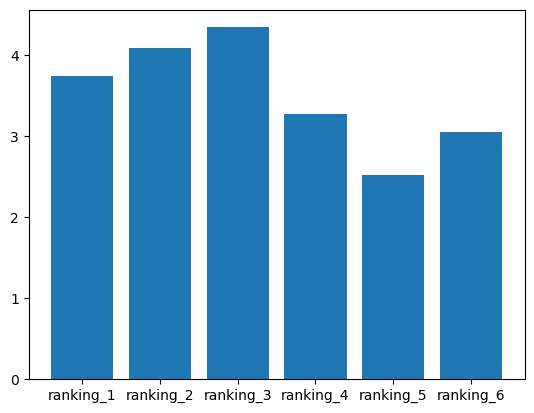

In [59]:
cols_ranking_cleaned = [f"ranking_{i+1}" for i in range(0,6)]

ranking_means = survey[cols_ranking_cleaned].mean()

plt.bar(cols_ranking_cleaned, ranking_means)
plt.show()

The figure above indicates that Episode V was ranked as the best of Star Wars movies by the respondents.